In [1]:
# Importing
import mne
import os
import ipympl

# for visualization
import matplotlib.pyplot as plt
plt.style.use('bmh')
%matplotlib inline

mne.viz.set_browser_backend('matplotlib')

Using matplotlib as 2D backend.


In [2]:
# 1. Specify the path to your .vhdr file (MNE will find the .eeg/.vmrk automatically)
vhdr_fname = os.path.join('./experiment_data', 'Subject_03', 'EEG', 'Fatigue_03.vhdr')

In [3]:
# 2. Read the raw data
# preload=True loads all data into memory; set False if your file is huge
raw = mne.io.read_raw_brainvision(vhdr_fname, preload=True)
montage = mne.channels.make_standard_montage('standard_1020')
raw.set_montage(montage)

Extracting parameters from ./experiment_data/Subject_03/EEG/Fatigue_03.vhdr...
Setting channel info structure...
Reading 0 ... 1894199  =      0.000 ...  1894.199 secs...


<RawBrainVision | Fatigue_03.eeg, 14 x 1894200 (1894.2 s), ~202.3 MB, data loaded>

In [4]:
# 3. Inspect basic info
print(raw)                   # number of channels, sampling frequency, etc.
print(raw.info['ch_names'])  # list of channel names

<RawBrainVision | Fatigue_03.eeg, 14 x 1894200 (1894.2 s), ~202.3 MB, data loaded>
['F3', 'Fz', 'F4', 'FC3', 'FCz', 'FC4', 'C3', 'C4', 'P3', 'Pz', 'P4', 'O1', 'Oz', 'O2']


In [5]:
print(raw.info)

<Info | 8 non-empty values
 bads: []
 ch_names: F3, Fz, F4, FC3, FCz, FC4, C3, C4, P3, Pz, P4, O1, Oz, O2
 chs: 14 EEG
 custom_ref_applied: False
 dig: 17 items (3 Cardinal, 14 EEG)
 highpass: 0.0 Hz
 lowpass: 280.0 Hz
 meas_date: 2025-05-16 18:46:38 UTC
 nchan: 14
 projs: []
 sfreq: 1000.0 Hz
>


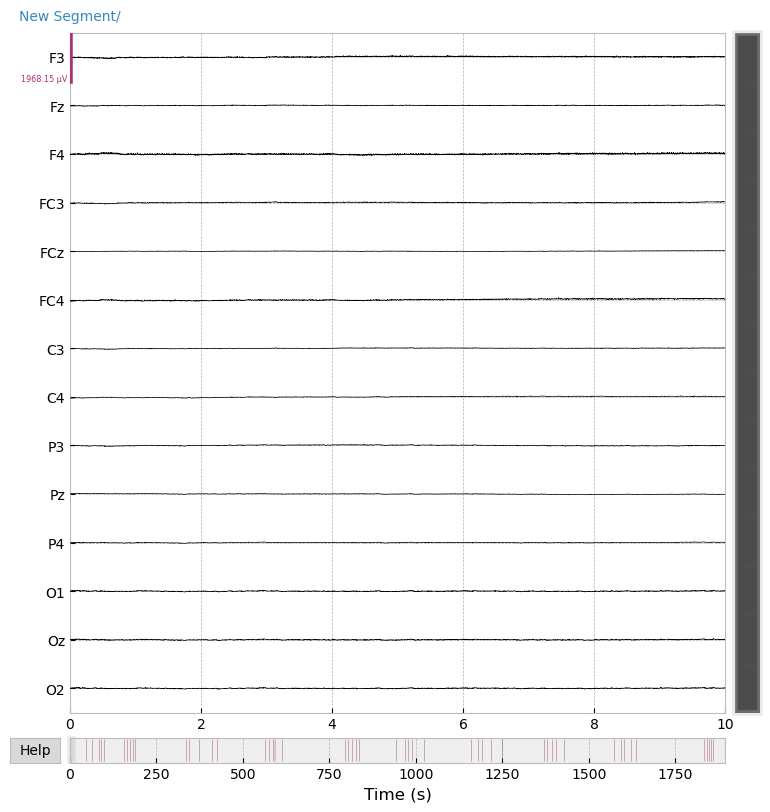

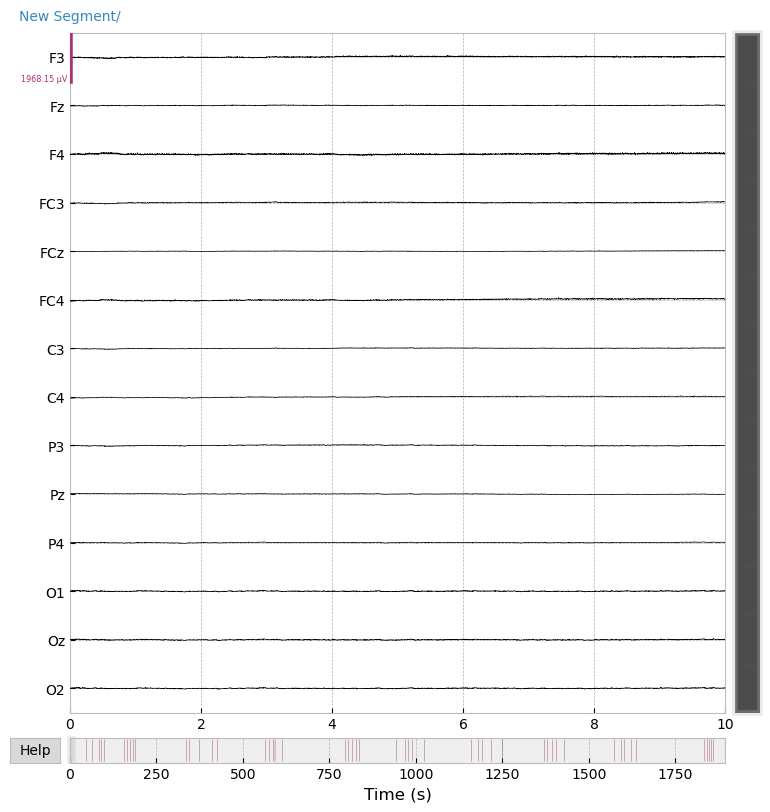

In [6]:
# 4. Plot the raw time series
#    - n_channels: how many channels to display at once
#    - scalings='auto': automatic amplitude scaling per channel
#    - title: figure title

original_raw = raw.copy()

raw.plot(n_channels=14,
         scalings='auto',
         show=True,
         title='Raw EEG (Fatigue_03)')

In [7]:
# 5. Simple preprocessing: band-pass filter between 1–40 Hz
raw_filtered = raw.copy().filter(1.0, 40.0,
                                 fir_design='firwin',
                                 verbose=True)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 3301 samples (3.301 s)



[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.3s finished


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 2.048 (s)
Plotting power spectral density (dB=True).


/Users/rahul/miniconda3/envs/thesis-ml/lib/python3.10/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


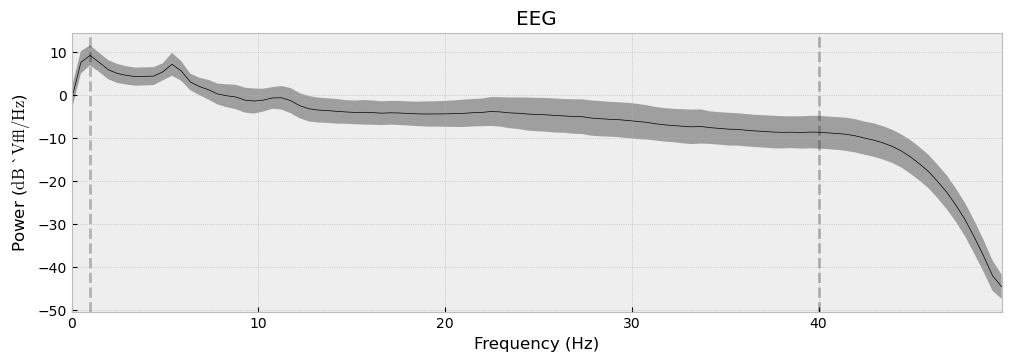

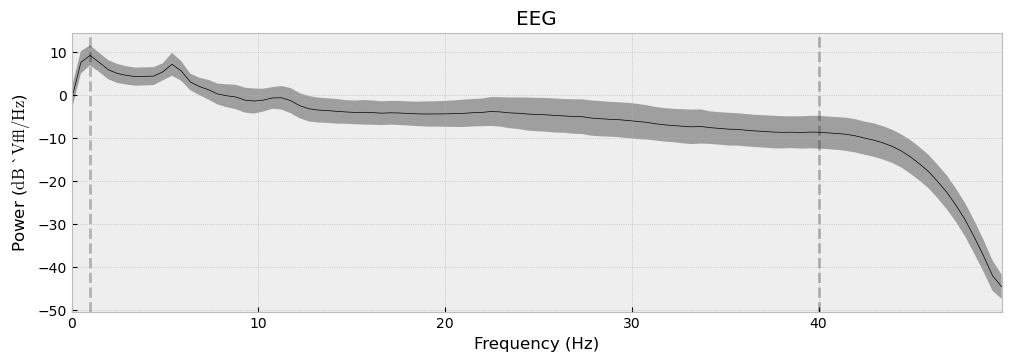

In [8]:
# 6. Plot power spectral density (PSD) up to 50 Hz
raw_filtered.plot_psd(fmax=50.0,
                      average=True,
                      show=True)

Effective window size : 2.048 (s)
Plotting power spectral density (dB=True).


/Users/rahul/miniconda3/envs/thesis-ml/lib/python3.10/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


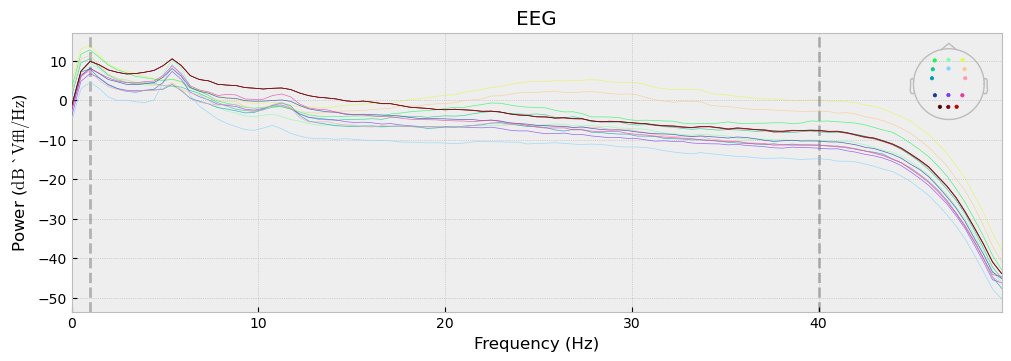

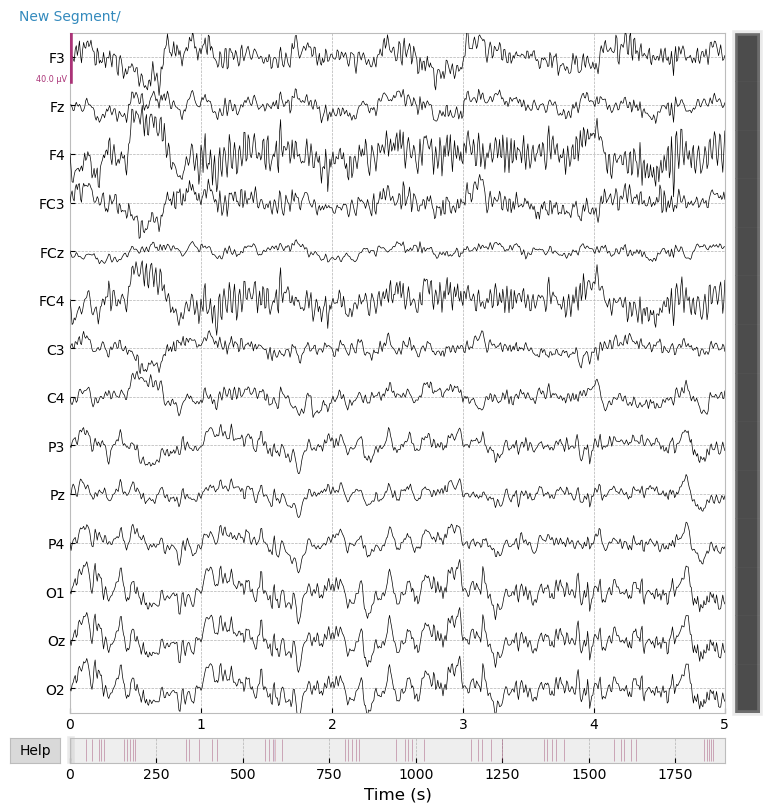

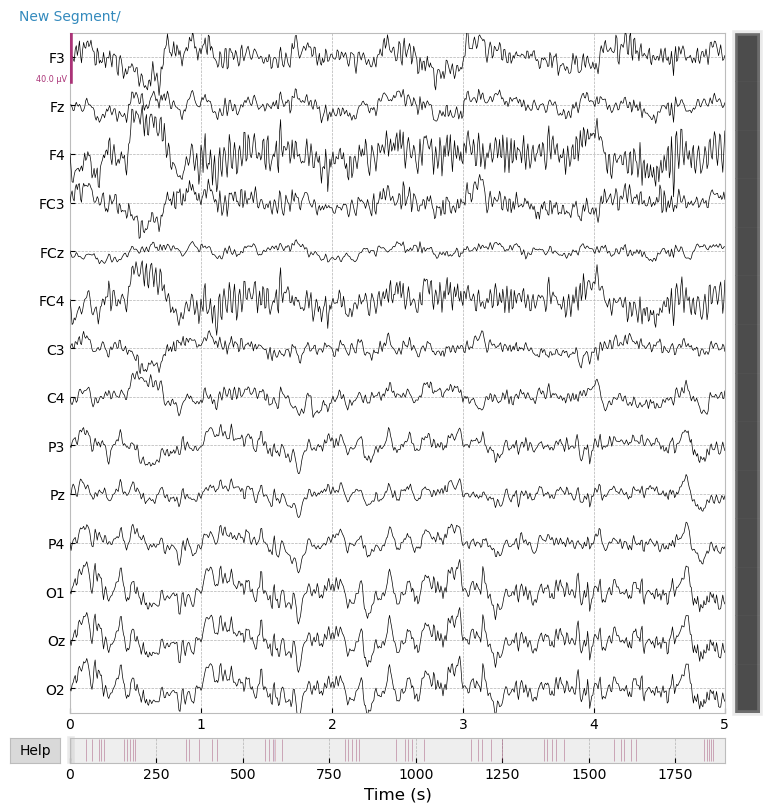

In [9]:
raw_filtered.compute_psd(fmax=50).plot(picks="data", exclude="bads", amplitude=False)
raw_filtered.plot(duration=5, n_channels=14)

In [10]:
# 7. (Optional) Save a snapshot of the figure
# fig = raw.plot(n_channels=10, show=False)
# fig.savefig('raw_eeg_snapshot.png', dpi=150)

Fitting ICA to data using 14 channels (please be patient, this may take a while)


/var/folders/3j/w0qrc74d6sj7fjdwc593xcqc0000gn/T/ipykernel_7606/2771092507.py:4: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 14 components
Fitting ICA took 11.1s.


/var/folders/3j/w0qrc74d6sj7fjdwc593xcqc0000gn/T/ipykernel_7606/2771092507.py:4: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (0.66) and smallest (5.2e-07) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw)


    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
947 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
947 matching events found
No baseline correction applied
0 projection items activated


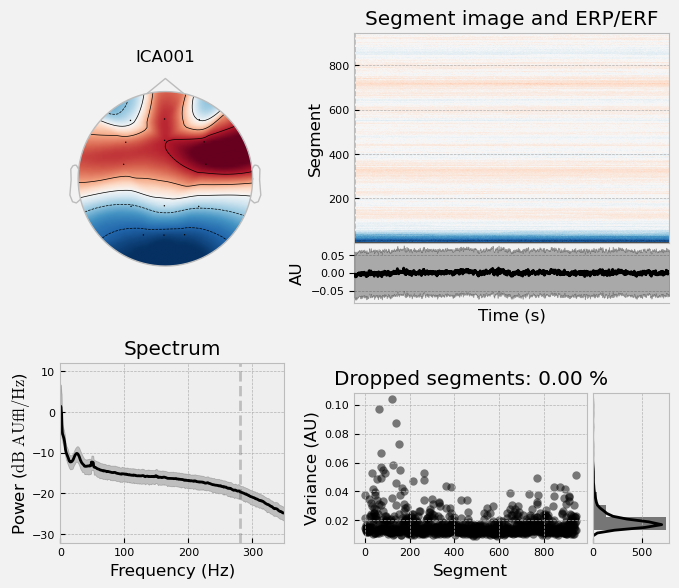

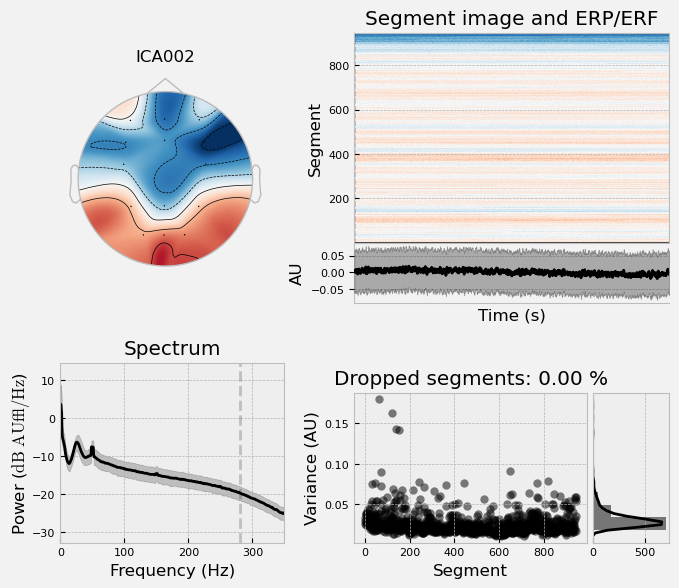

[<Figure size 700x600 with 6 Axes>, <Figure size 700x600 with 6 Axes>]

In [11]:
# TODO: New Notebook for Independent Component Analysis
# set up and fit the ICA
ica = mne.preprocessing.ICA(n_components=14, random_state=42, max_iter=800)
ica.fit(raw)
ica.exclude = [1, 2]  # details on how we picked these are omitted here
ica.plot_properties(raw, picks=ica.exclude)

### Checking EEG events

In [12]:
events, event_id = mne.events_from_annotations(raw)

Used Annotations descriptions: [np.str_('New Segment/'), np.str_('Response/R  1'), np.str_('Response/R  3')]


In [13]:
print(events[:5])

[[    0     0 99999]
 [45773     0  1003]
 [45778     0  1001]
 [63412     0  1003]
 [63416     0  1001]]


In [14]:
# Rename events to human‑readable keys — adjust to your marker scheme
rename_map = {
    'Response/R  1': 'stimulus',
    'Response/R  3': 'answer',
}
event_id_new = {new: event_id[old] for old, new in rename_map.items() if old in event_id}
print('old mapping:', event_id)
print('Renamed mapping:', event_id_new)

old mapping: {np.str_('New Segment/'): 99999, np.str_('Response/R  1'): 1001, np.str_('Response/R  3'): 1003}
Renamed mapping: {'stimulus': 1001, 'answer': 1003}


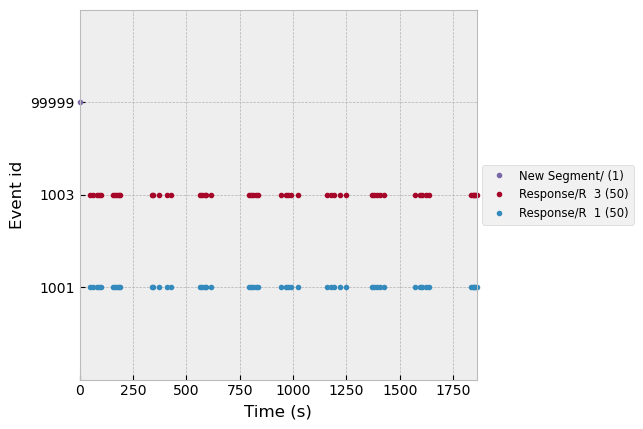

In [15]:
fig = mne.viz.plot_events(
    events, event_id=event_id, sfreq=raw.info["sfreq"], first_samp=raw.first_samp
)

In [16]:
# Creating epochs

# Epoching parameters
tmin, tmax   = -0.2, 0.8    # 200ms pre‑stimulus → 800ms post
baseline     = (None, 0)    # baseline‑correct using pre‑stimulus

epochs = mne.Epochs(raw, events, event_id,
                    tmin=tmin, tmax=tmax,
                    baseline=baseline,
                    event_repeated='merge',
                    preload=True)
print(epochs)

Not setting metadata
101 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 101 events and 1001 original time points ...
1 bad epochs dropped
<Epochs | 100 events (all good), -0.2 – 0.8 s (baseline -0.2 – 0 s), ~10.7 MB, data loaded,
 np.str_('New Segment/'): 0
 np.str_('Response/R  1'): 50
 np.str_('Response/R  3'): 50>


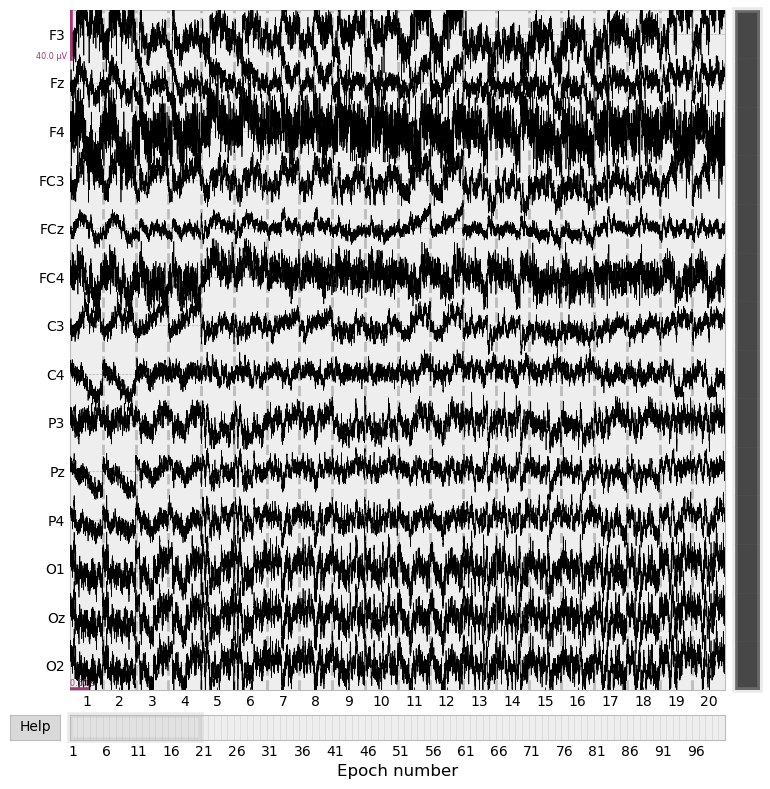

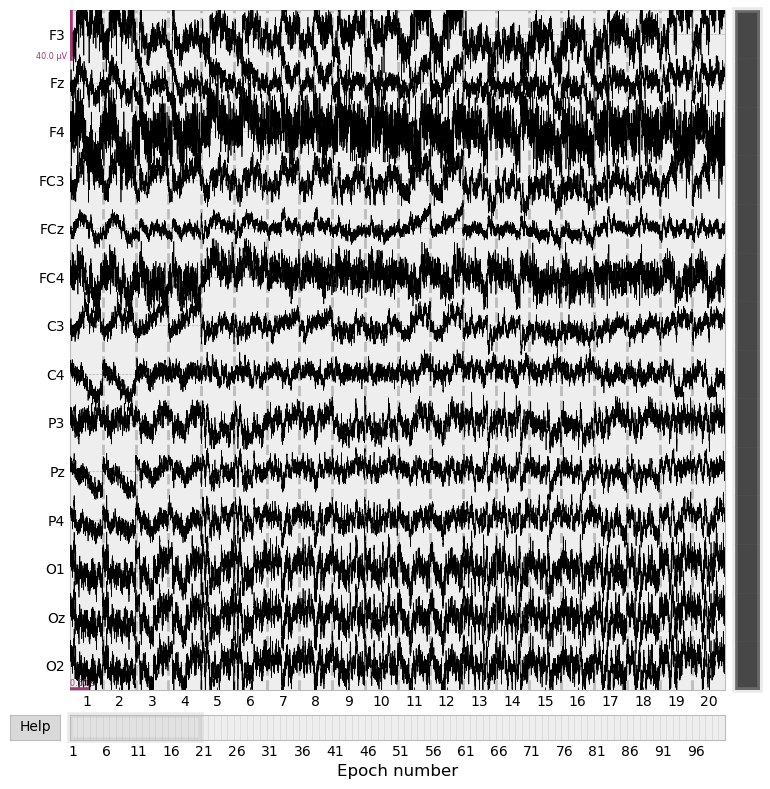

In [17]:
epochs.plot()

In [18]:
from autoreject import AutoReject, set_matplotlib_defaults

ar = AutoReject()
epochs_clean = ar.fit_transform(epochs)
epochs_clean = epochs_clean.average()

Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/14 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/14 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/100 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/100 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/100 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/100 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.50 and n_interpolate=1


  0%|          | Repairing epochs : 0/100 [00:00<?,       ?it/s]

Dropped 8 epochs: 24, 25, 38, 39, 80, 81, 84, 85


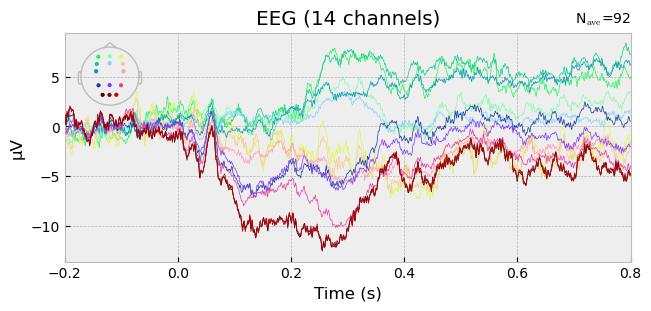

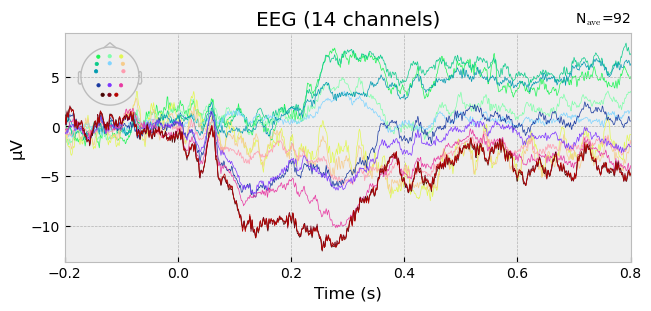

In [19]:
epochs_clean.plot()

In [20]:
# rejection threshold:
from autoreject import get_rejection_threshold
reject = get_rejection_threshold(epochs)

Estimating rejection dictionary for eeg


In [21]:
# TODO: stc plot for comparison of epochs and cleaned_epochs

In [22]:
from autoreject import Ransac
rsc = Ransac()
epochs_clean = rsc.fit_transform(epochs)

  0%|          | interpolating channels : 0/50 [00:00<?,       ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


  0%|          | Iterating epochs : 0/100 [00:00<?,       ?it/s]

[Done]
Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 96.2 mm
Computing interpolation matrix from 13 sensor positions
Interpolating 1 sensors


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.2s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s finished
